<a href="https://colab.research.google.com/github/VicenteMercado/ADA-Informes/blob/main/Informe3_MaxSubArray.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Problema del subarreglo máximo.

**Entrada**: Arreglo de números $[a_1,a_n]$.

**Salida**: Sub-arreglo $[a_i,..,a_j]$, tal que la suma de los elementos es mayor o igual a cualquier otro sub-arreglo, es decir, $\sum\limits_{k=i}^j a_k \geq \sum\limits_{k=i'}^{j'} a_k$ , para cualquier par $(i',j')$, con $i' \leq j'\leq n$.


Los problemas de optimización son bastante comunes, tanto en la vida cotidiana como en el cálculo matemático, y sirven para hallar la vía más rápida o "mejor" a una solución acorde a la situación impuesta.
Un ejemplo de problema de optimización es cuando nos piden las dimensiones del **área máxima** de todos los triángulos cuyos catetos midan 10 centímetros.

![image](https://www.funciones.xyz/wp-content/uploads/2021/07/problema-de-optimizacion-triangulo-300x272.png?ezimgfmt=ng:webp/ngcb1)

Un problema de este tipo son los problemas del subarreglo máximo, la metodología que se utiliza para hallar el subarreglo contiguo a una matriz unidimensional de elementos, el cual posee la suma más grande posible frente a cualquier otro subarreglo. 

Si recordamos el informe anterior, habíamos visto que el paradigma "*divide y vencerás*" tiene la gran utilidad de "simplificar" un problema, dividiéndolo en subproblemas de menor tamaño para después solucionarlos individualmente y llegar a la respuesta del problema original. Esta técnica es buena alternativa para el problema del subarreglo máximo, al poder separar el arreglo en partes y analizar cada caso de manera más óptima. 


#2. MaxSubArray

##2.1 Código

El siguiente código muestra una implementación del algoritmo `MaxSubArray` a partir del paradigma **"divide y vencerás"**.

In [ ]:
def maxSubArray(arr, low, high, verbose = False):

  if low == high-1:
    return low, high, arr[low]
  
  mid = (low + high) //2
  if verbose == True: print("Se divide el arreglo: ", arr[:mid], arr[mid:])
  left_low, left_high, left_max = maxSubArray(arr, low, mid, verbose)
  if verbose == True:
    print(arr[left_low:left_high])
    print("Suma máxima arreglo izquierdo: ", left_max)
  right_low, right_high, right_max = maxSubArray(arr, mid, high, verbose)
  if verbose == True:
    print(arr[right_low:right_high])
    print("Suma máxima arreglo derecho: ", right_max)

  if verbose == True: 
    print("");
    print("Se analiza el arreglo medio.");
  cross_low, cross_high, cross_max = maxSubArrayMid(arr, low, mid, high, verbose)

  if(right_max > cross_max and right_max > left_max):
    return right_low, right_high, right_max
  elif(left_max > cross_max and left_max > right_max):
    return left_low, left_high, left_max
  else:
    return cross_low, cross_high, cross_max

def maxSubArrayMid(arr,start,mid,end, verbose = False):
  suma_izq = float('-inf') #Número real infinitamente pequeño que permitirá comparar para hallar la suma máxima por ambos lados del arreglo.
  suma_temp = 0 #Almacena temporalmente la suma total de las posiciones.
  sub_inicio = mid 
  
  if verbose == True: print("Analizando lado izquierdo del arreglo...")
  for i in range(mid-1, start-1, -1): #Se analiza el arreglo por la izquierda de mid.
    suma_temp += arr[i]
    if suma_temp > suma_izq: #Si la suma actual es mayor, se consigue un nuevo máximo izquierdo y se define la posición como inicio del sub-arreglo.
      if verbose == True: print("Máximo izquierdo: ", suma_temp)
      suma_izq = suma_temp
      sub_inicio = i
      if verbose == True: print(arr[sub_inicio:mid])
  
  suma_der = float('-inf') 
  suma_temp = 0
  sub_fin = mid+1
  
  if verbose == True: print("Analizando lado derecho del arreglo...")
  for i in range(mid, end): #Se analiza el arreglo por la derecha de mid.
        suma_temp = suma_temp + arr[i]
        if suma_temp > suma_der: #Si la suma actual es mayor, la suma consigue un nuevo máximo derecho y se define la posición siguiente como final del sub-arreglo.
            if verbose == True: print("Máximo derecho: ", suma_temp)
            suma_der = suma_temp
            sub_fin = i + 1
            if verbose == True: print(arr[mid:sub_fin])
  
  suma_total = suma_izq + suma_der
  if verbose == True: print("Suma máxima de arreglo medio: ", suma_total)

  return sub_inicio, sub_fin, suma_total #Se retornan la posición inicial y final del sub-arreglo, junto con la suma máxima total.


#Ejemplo

arr = [3, 4, -1, -2, 3, 5,-2, 1]
print("Input array: ", arr)
init, fin, max = maxSubArray(arr, 0, len(arr))
print("Max sum : ", max)
print("initial and final positions: {}, {}".format(init,fin-1))
print("Max Subarray found: ", arr[init:fin])

Input array:  [3, 4, -1, -2, 3, 5, -2, 1]
Max sum :  12
initial and final positions: 0, 5
Max Subarray found:  [3, 4, -1, -2, 3, 5]


##2.2 Descripción del algoritmo.

El algoritmo recibe como entrada una lista (o arreglo)  arr  con la secuencia de  n  elementos de la cual se desea saber su subarreglo máximo.

1. Para cada llamada recursiva, `maxSubArray` divide el arreglo de entrada por la mitad ($mid = (low+high) // 2$) en una partición izquierda ($[0,...,mid-1]$) y una derecha ($[mid,..., n-1]$), y luego se llama a sí misma con cada partición.

2. Si la partición resultante está compuesta de una sóla posición, entonces técnicamente su única posición contiene la suma máxima y por ende se retorna. En caso contrario, se repite el **paso 1**.

3. Se analiza la suma máxima de cada partición del arreglo, además de un tercer subarreglo que pasa por la mitad del arreglo con la función `maxSubArrayMid`.

4. Finalmente, se retorna el subarreglo que contenga la suma máxima frente a los demás mencionados, junto a su correspondiente suma máxima.


$n$ será el tamaño del problema en cuestión.

Cuando la variable `verbose` es `True`, se muestra información por pantalla para ver lo que sucede paso a paso dentro de la función de una forma más explícita.



##2.3 Ejemplo 

Tengamos en cuenta el siguiente arreglo:

* $x = [4, -2, 3, 4, 1, 4, -5]$

En primer lugar, se divide el arreglo por su mitad y se generan dos subarreglos.

* $x_a = [4, -2, 3] ; x_b = [4, 1, 4, -5]$

Se vuelven a dividir los arreglos hasta que todos los elementos queden dentro de un arreglo de largo 1.

* $x_a = [4, -2] ; x_b = [3] ; x_c = [4, 1] ; x_d = [4, -5]$

* $x_a = [4] ; x_b = [-2] ; x_c = [3] ; x_d = [4] ; x_e = [1] ; x_f = [4] ; $
 
 $x_g = [-5]$

Luego, se analiza la suma máxima de cada partición generada y se vuelven a unir, así consecutivamente hasta volver al arreglo original.

* $x_a = [4, -2] ; x_b = [3] ; x_c = [4, 1] ; x_d = [4, -5]$

$max. izq = 4  ; max. der = 5$


* $x_a = [4, -2, 3] ; x_b = [4, 1, 4, -5]$

$max. izq = 4  ; max. der = 9$



* $x = [4, -2, 3, 4, 1, 4, -5]$

$max. izq. = 4 ; max. der. = 9$

Se analiza el arreglo y se genera un subarreglo que pasa por su posición media.

* $x_c = [4, -2, 3, 4, 1, 4]$ 

$max. medio = 14$

Finalmente y como el subarreglo medio ($x_c$) posee el mayor máximo de los tres existentes, se dice que es el subarreglo máximo posible.



##2.4 Ejecución del programa paso a paso.

Usando la opción `verbose = True`, se puede apreciar qué ocurre durante el proceso del algoritmo y sus llamadas recursivas. Con propósito de probar distintos casos, se utilizará un arreglo de tamaño $n = 5$, con elementos generados al azar en un rango del -100 al 100 cada uno.


In [ ]:
import random
a = random.sample(range(-100, 100), 5)
print("Input array: ", a)
print("")
init, end, max = maxSubArray(a,0,len(a), verbose=True)
print("\nMax sum : ", max)
print("initial and final positions: {}, {}".format(init,end-1))
print("Max Subarray found: ", a[init:end])

Input array:  [-50, 11, -35, -73, -66]

Se divide el arreglo:  [-50, 11] [-35, -73, -66]
Se divide el arreglo:  [-50] [11, -35, -73, -66]
[-50]
Suma máxima arreglo izquierdo:  -50
[11]
Suma máxima arreglo derecho:  11

Se analiza el arreglo medio.
Analizando lado izquierdo del arreglo...
Máximo izquierdo:  -50
[-50]
Analizando lado derecho del arreglo...
Máximo derecho:  11
[11]
Suma máxima de arreglo medio:  -39
[11]
Suma máxima arreglo izquierdo:  11
Se divide el arreglo:  [-50, 11, -35] [-73, -66]
[-35]
Suma máxima arreglo izquierdo:  -35
Se divide el arreglo:  [-50, 11, -35, -73] [-66]
[-73]
Suma máxima arreglo izquierdo:  -73
[-66]
Suma máxima arreglo derecho:  -66

Se analiza el arreglo medio.
Analizando lado izquierdo del arreglo...
Máximo izquierdo:  -73
[-73]
Analizando lado derecho del arreglo...
Máximo derecho:  -66
[-66]
Suma máxima de arreglo medio:  -139
[-66]
Suma máxima arreglo derecho:  -66

Se analiza el arreglo medio.
Analizando lado izquierdo del arreglo...
Máximo i

#3. Tiempo de ejecución

##3.1 Teorema

El algoritmo `MaxSubArray` tiene un tiempo de ejecución de $O(n log(n))$ **en el peor y mejor caso**.


##3.2 Prueba de Teorema (Árbol de recursión)

Si observamos detenidamente el código de `MaxSubArray`, podemos inferir que su complejidad es $O(nlog(n))$ debido a que la áltura del árbol recursivo formado al dividir consecutivamente el arreglo en subarreglos es $log(n)$, y en cada nivel es necesario iterar sobre todos los elementos para poder sumarlos y hallar la posible suma máxima en cada subarreglo, lo cual tiene complejidad $O(n)$.

![image](https://cdn.kastatic.org/ka-perseus-images/5fcbebf66560d8fc490de2a0d8a0e5b1d65c5c54.png)

#4. Correctitud



##4.1 Teorema 1 (Correctitud del algoritmo MaxSubArrayMid)

El algoritmo `maxSubArrayMid` retorna la suma máxima de los valores contiguos de un arreglo de un subarreglo $[i,...,j]$ que pasa por la posición media y contiene los elementos de un arreglo $[a_1,a_2,a_3...,a_n]$.

###Prueba del teorema 1

Para probar la correctitud de este algoritmo, vamos a emplear la siguiente **propiedad de bucle invariante**:

> *Al comienzo de la i-ésima iteración en cada ciclo for, las sumatorias `suma_izq` y `suma_der` contendrán la suma máxima contenida entre los subarreglos $arr[i,...,mid]$ y $arr[mid+1,...,j]$, con $mid$ la mitad del arreglo $arr$, donde $low \leq i \leq mid$ y $mid +1 \leq j \leq high$*.

**Inicialización**

Antes de la primera iteración ($i=1$) para ambos bucles, decimos que los elementos $A[mid]$ y $A[mid+1]$ son la suma máxima en aquella instancia. En este sentido `suma_izq = suma_der = 0`, por tanto y trivialmente la suma máxima en el arreglo equivale a este número.

**Mantención**

Durante la i-ésima iteración para el primer ciclo, se analizará si la suma total del subarreglo $[mid-i,...,mid]$ entrega un valor mayor al registrado en la suma de la iteración anterior. Si se cumple, el valor previo se reemplaza con la suma máxima actual. Esto mismo ocurre con el segundo ciclo al momento de analizar la suma del subarreglo $[mid+ 1,...,mid+1+i]$ por cada i-ésima iteración.

Juntando los subarreglos máximos hallados y sumando los valores consecutivos entre los dos ciclos, el resultado concordará con lo presentado por el teorema y nos entregará la suma máxima de la subsecuencia que contiene elementos del arreglo base.

**Correctitud**

Tras verificar que la propiedad empleada se cumple tanto antes como durante la ejecución de ambos ciclos, se puede afirmar que **MaxSubArrayMid es correcto**.


##4.2 Teorema 2 (Correctitud del algoritmo MaxSubArray)

*Para todo $n$ potencia de 2, `MaxSubArray` encuentra la subsecuencia con la mayor suma dentro de un arreglo de largo $n$*.


###Prueba del teorema 2


Para probar la correctitud de `MaxSubArray`, vamos a emplear la siguiente hipótesis $P(n)$:

> `MaxSubArray` retorna los índices y la suma máxima del subarreglo $[i,...,j]$ compuesto por elementos del arreglo original, cuya suma máxima sea la mayor de cualquier otro subarreglo generado.

**Caso base $(n = 1)$**

Para este caso, al ver que nuestro arreglo contiene solamente un elemento, técnicamente su único elemento es la suma máxima posible y por ende el algoritmo retorna sus datos, lo cual es trivialmente cierto.

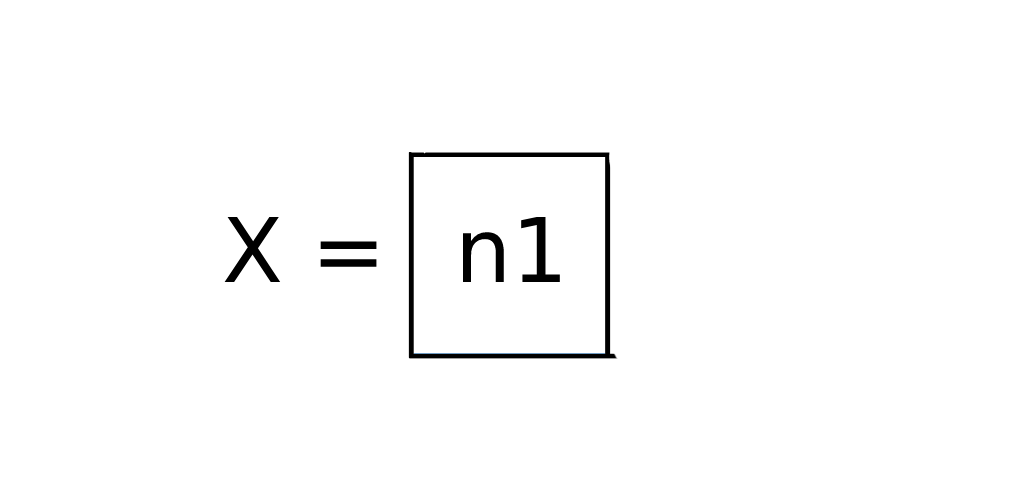

**Caso inductivo $(m < n)$**

Para un arreglo de $n$ elementos, nuestro algoritmo lo divide en dos subarreglos de izquierda y derecha, de tamaño $m = n/2$ y $m = n/2$ respectivamente. Ya que el tamaño de estos subarreglos es menor a $n$, a través de la inducción matemática se puede decir que cada partición contiene una posible suma máxima para el arreglo original.

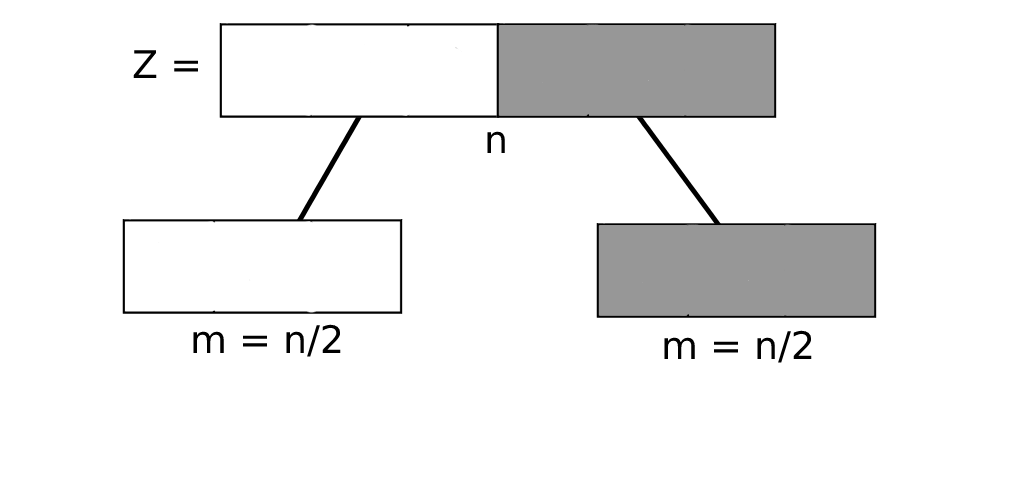

Después, se analiza el subarreglo que contiene a la posición media del arreglo dentro de la función `MaxSubArrayMid`. Como en el teorema 1 se comprobó que es correcta, esta siempre retornará los datos del subarreglo medio para luego comparar con las particiones laterales y retornar el subarreglo máximo, comprobando así que **MaxSubArray es correcto**.

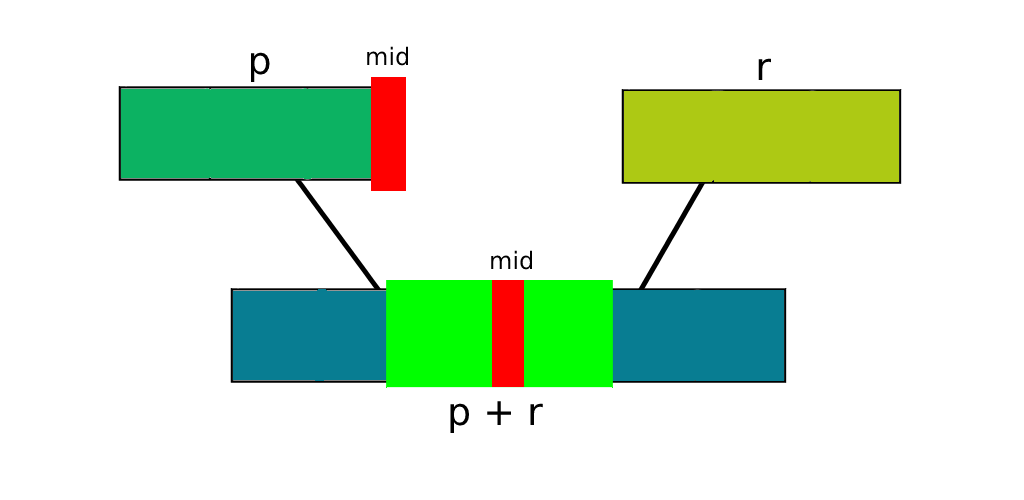



#5. Experimentos

##5.1 Tiempo de ejecución (*Divide y vencerás vs Kadane*)

El siguiente gráfico mostrará la comparación de tiempos de ejecución del algoritmo `maxSubArray` implementado con el paradigma "Divide y vencerás" frente a la implementación del Algoritmo de Kadane, en función del tamaño del problema para arreglos generados aleatoriamente de tamaños entre 5 y 500.

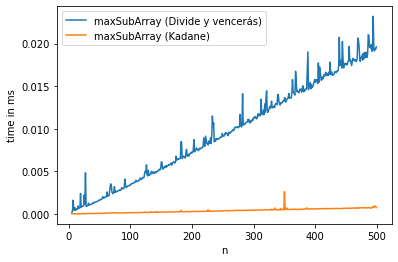

In [39]:
import matplotlib.pyplot as plt
import datetime
from timeit import repeat

def maxSubArrayKadane(a,size):
      
    max_so_far = a[0]
    max_ending_here = 0
      
    for i in range(0, size):
        max_ending_here = max_ending_here + a[i]
        if max_ending_here < 0:
            max_ending_here = 0
        elif (max_so_far < max_ending_here):
            max_so_far = max_ending_here
              
    return max_so_far

x1=[]; x2=[];y1=[]; y2=[]

for n in range(5,500):

  a = random.sample(range(-500, 500), n)

  #la función repeat está ejecutando 20 veces maxSubArray con el arreglo a y retorna el mejor tiempo obtenido.
  t = repeat(setup="from __main__ import maxSubArray", stmt=f"maxSubArray({a},{0},{len(a)})", repeat=1, number=10)

  x1.append(n)
  y1.append(t)

for n in range(5,500):

  arr = random.sample(range(-500, 500), n)

  #la función repeat está ejecutando 20 veces maxSubArrayKadane con el arreglo arr y retorna el mejor tiempo obtenido.
  time = repeat(setup="from __main__ import maxSubArrayKadane", stmt=f"maxSubArrayKadane({arr},{len(arr)})", repeat=1, number=10)

  x2.append(n)
  y2.append(time)


plt.plot(x1,y1)
plt.plot(x2,y2)
plt.legend(["maxSubArray (Divide y vencerás)", "maxSubArray (Kadane)"])

plt.xlabel('n')
plt.ylabel('time in ms')
plt.show()

###Análisis de resultados

Como podemos ver en el gráfico, la implementación con el Algoritmo de Kadane posee tiempos de ejecución mucho más bajos en comparación a cuando se utiliza el paradigma "Divide y vence". Esto se debe principalmente a que el primero solo recorre el arreglo de izquierda a derecha para sumar las posiciones una por una y hallar la suma máxima, por lo que tiene un tiempo de ejecución $O(n)$. 

##5.2 Tiempo de ejecución (*Divide y vencerás vs Fuerza Bruta*)

El siguiente gráfico mostrará la comparación de tiempos de ejecución del algoritmo `maxSubArray` implementado con el paradigma "Divide y vencerás" frente a la implementación con Fuerza Bruta o (Brute Force), en función del tamaño del problema para arreglos generados aleatoriamente de tamaños entre 5 y 500.


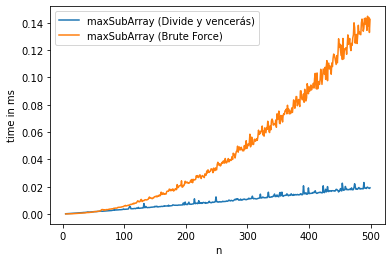

In [46]:
import matplotlib.pyplot as plt
import datetime
from timeit import repeat

def maxSubArrayBF(a,size):
    max_sum = 0
    for i in range(0, size-1):
       sum=0
       for j in range(i, size-1):
         sum = sum +  a[j]
         if (sum > max_sum):
             max_sum = sum
    return max_sum  

x1=[]; x2=[];y1=[]; y2=[]

for n in range(5,500):

  a = random.sample(range(-500, 500), n)

  #la función repeat está ejecutando 20 veces maxSubArray con el arreglo a y retorna el mejor tiempo obtenido.
  t = repeat(setup="from __main__ import maxSubArray", stmt=f"maxSubArray({a},{0},{len(a)})", repeat=1, number=10)

  x1.append(n)
  y1.append(t)

for n in range(5,500):

  arr = random.sample(range(-500, 500), n)

  #la función repeat está ejecutando 20 veces maxSubArrayKadane con el arreglo arr y retorna el mejor tiempo obtenido.
  time = repeat(setup="from __main__ import maxSubArrayBF", stmt=f"maxSubArrayBF({arr},{len(arr)})", repeat=1, number=10)

  x2.append(n)
  y2.append(time)


plt.plot(x1,y1)
plt.plot(x2,y2)
plt.legend(["maxSubArray (Divide y vencerás)", "maxSubArray (Brute Force)"])

plt.xlabel('n')
plt.ylabel('time in ms')
plt.show()

###Análisis de resultados

Podemos apreciar que la implementación de `MaxSubArray` con Fuerza Bruta posee un tiempo de ejecución mayor y con crecimiento exponencial en comparación al crecimiento lineal de la implementación a partir del paradigma. Esto bien era de esperarse, debido a que el primer método repasa todo posible subarreglo existente dentro del arreglo y encuentra la suma de todos ellos para dar con la suma máxima, lo cual posee un tiempo de ejecución $O(n^2)$ y, por ende, lo hace el más ineficiente.